# Plotting CapCruncher output

## Introduction

This is a quick overview of the plotting functionality of CapCruncher. Please ensure that you have installed the optional dependencies for CapCruncher by running:

``` bash
pip install capcruncher[full]
```

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import coolbox.api as cb
from capcruncher.api.plotting import CCTrack, CCFigure
import pyranges as pr

## Read plotting coordinates

In [2]:
viewpoints = pr.read_bed("alpha_tile_mm9.bed")
viewpoints

,Chromosome,Start,End,Name
0,chr11,29902950,33226736,Alpha


## Plot using the CapCruncher API

First create a number of `CCTrack` instances supported track types:

- heatmap - a contact matrix heatmap in cool format 
- bigwig  - a bigwig file containing the number of reads per bin
- bigwig_summary - a collection of bigwig files containing the number of reads per bin
- scale - a scale bar. Does not require a file to be specified
- bed  - a bed file
- xaxis  - an x-axis of genomic coordinates. Does not require a file to be specified
- genes - a gene track in bed12 format 
- spacer - a spacer track. Does not require a file to be specified


## Create new `CCTrack` objects

### Option 1: Create a list of `CCTrack` objects and pass them to CCFigure

In [3]:
tracks = [
    CCTrack(None, type="scale"),
    CCTrack(
        "capcruncher_output/results/WT_FL_S3_Replicate1/WT_FL_S3_Replicate1.hdf5",
        type="heatmap",
        binsize=2000,
        title="Alpha Tile",
        viewpoint="Alpha",
        normalization="ice",
        transform="yes",
        style="triangular",
    ),
    CCTrack(None, type="spacer"),
    CCTrack(None, type="spacer"),
    CCTrack(None, type="xaxis"),
]

fig = CCFigure(tracks, auto_spacing=False)

### Option 2: Create a `CCFigure` object and add tracks to it

As this would overwrite the previous figure, we will create a new figure and add the tracks to it.

In [4]:
fig2 = CCFigure(tracks, auto_spacing=False)
fig2.add_track(CCTrack(None, type="scale"))

## Plot the figure (Optional)

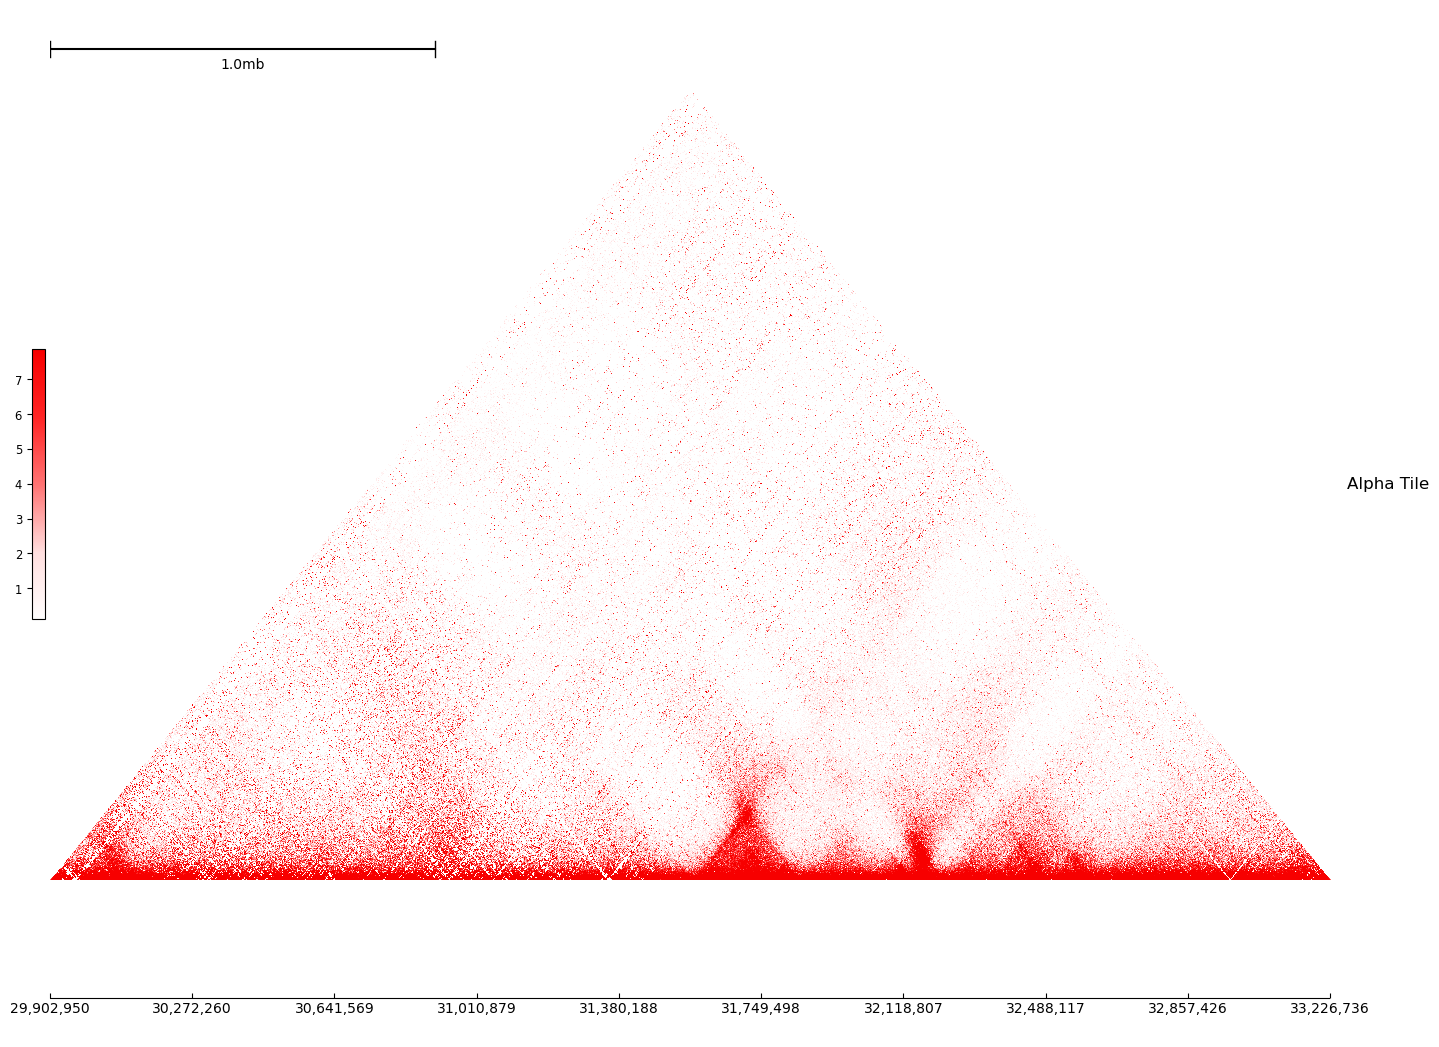

In [5]:
# Plot a specific region if desired
fig.plot("chr11:29902950-33226736")

## Save the figure

Two options: 

1. Save the figure as a static image using the save method of the `CCFigure`.
2. Save the `CCFigure` as a TOML file which can be edited and either reloaded into a `CCFigure` or used by the command line interface to generate a new figure using `capcruncher plot make-plot`.


### Option 1: Save the figure to a file 

In [6]:
fig.save("chr11:29902950-33226736", output="test.png")

### Option 2: Save the figure as a template

In [7]:
fig.to_toml(output="template.toml")

This will look something like this:

In [21]:
!head -n 15 template.toml

["scale 0"]
type = "scale"

["spacer 0"]
type = "spacer"

["spacer 1"]
type = "spacer"

["Alpha Tile"]
type = "heatmap"
binsize = 2000
title = "Alpha Tile"
viewpoint = "Alpha"
normalization = "ice"


This template can be re-loaded using the CapCruncher package e.g. using the `CCFigure.from_toml` method. You can also add new tracks to the figure and re-plot it.

See this rather contrived example of reloading the figure and adding a new scale bar to it.

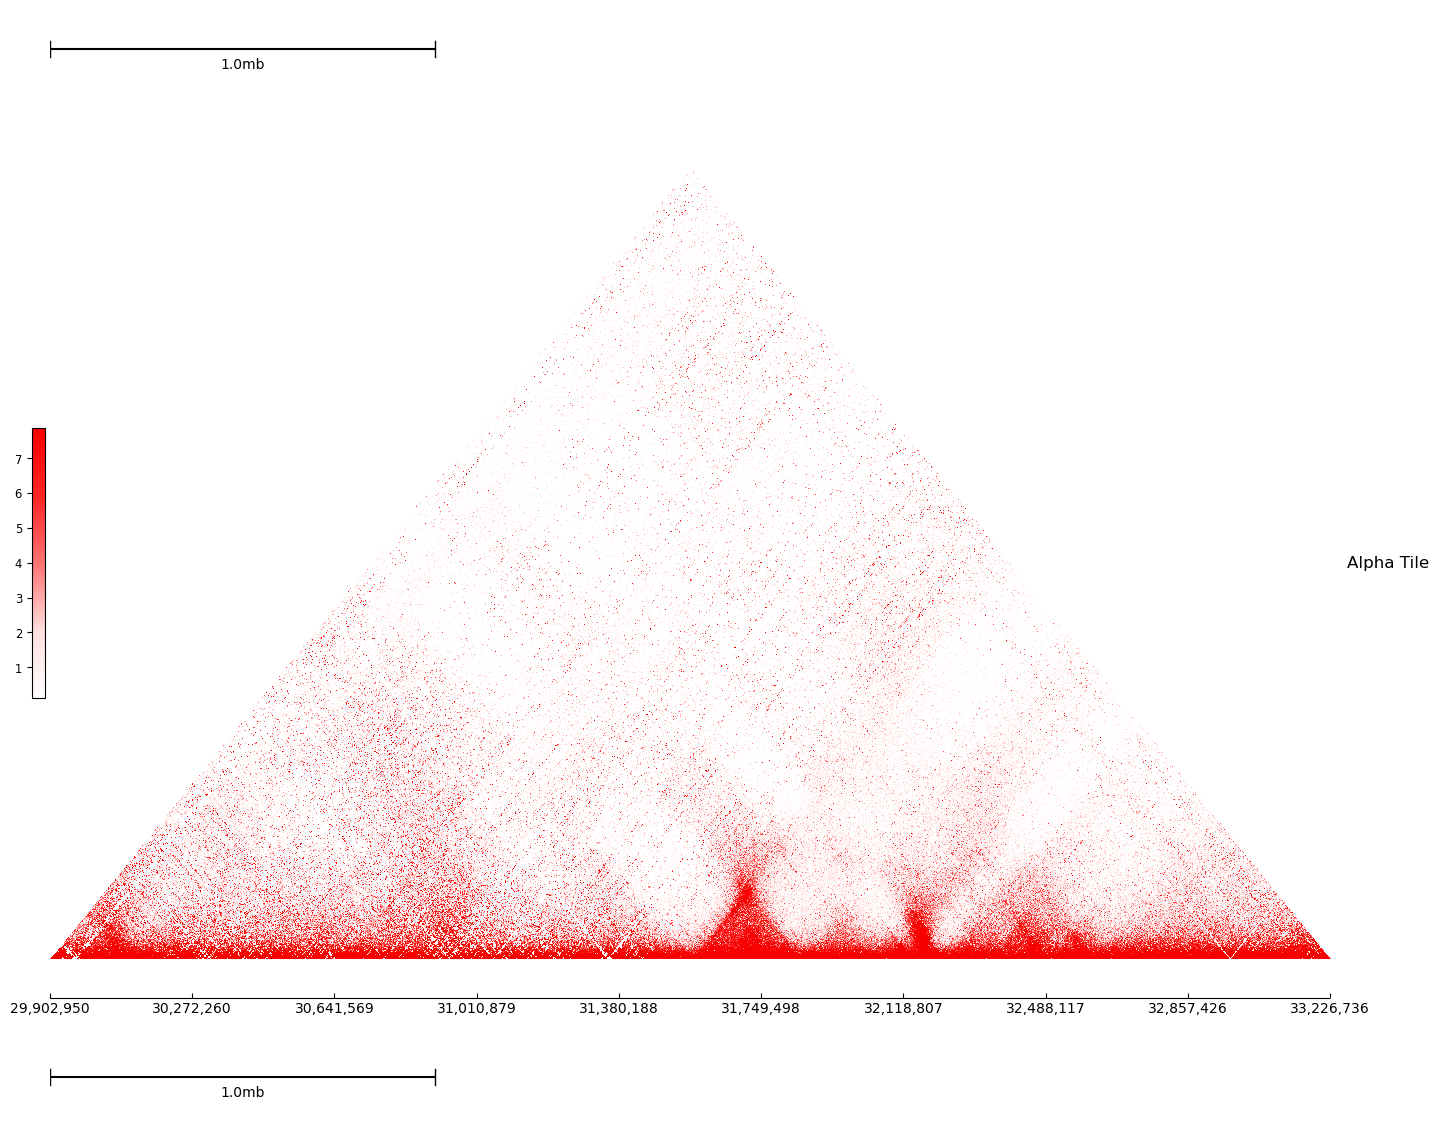

In [14]:
fig = CCFigure.from_toml("template.toml")
fig.add_track(CCTrack(None, type="scale"))
fig.plot("chr11:29902950-33226736")

Alternatively the template can be edited and used on the commandline with `capcruncher plot` e.g.

In [18]:
%%bash
capcruncher \
plot \
--template template.toml \
--region chr11:29902950-33226736 \
-o test.png

This will generate the same figure as before:

![plot](./test.png)